**---------------------------------------------------------------------------------------------------------------------------------**

# Objective

Building a predictive model with anonymized variables which can find patterns between variables and suggest whether hack  
is going to happen or not so that cyber security can stop before it happens

**---------------------------------------------------------------------------------------------------------------------------------**

### Problem Approach-High Level

1.Predictors given are anonymized logging parameters hence do not imply any meaning to us directly.Therefore we could apply statistical approach like correlation map and pairplot to find meaning from these parameters and how they respond to each other. 
  
2.'Date' column could give a very good idea on how much attacks/hacks has happened over the years,'Date' may also help us to track some <b>events</b> which has happened in the past which could have led to data hacks.    
  
3.If there is a presence of multicollineartiy evident from correlation and pairplot we could eliminate the variable from those   pair of variables showing high multicollinearity since such pair of variables would interact with each other more than what     they interact with the target variable individually.  
  
4.Research for possibility of combining/clustering logging parameters in a group and finding meaning within each group/clusters  which could have led to hacking.  

5.Find if class-imbalance is present for the given data,if majority of  data points are pertaining to a single class,model wont learn much from train data.Possibility of applying SMOTE to train data.  

6.Build and train model. Model building can be approached in two ways,based on performance we could select the model from an approach.The two ways are:
 - Parametric Models  
 - Non Parametric Models  
  
7.Model performance on train can be checked using precision,recall,accuracy score and ROC-AUC.Hyperparameter tuning can be done to enhance the performance of the model.    
  
8.Here we could avoid checking outliers since parameters given are anonymized, treating outliers might lead to loss of  
information.Scaling or Standardization could be done to train data depending on the model we use.


**---------------------------------------------------------------------------------------------------------------------------------**

### Steps Involved

1. EDA.  
2. Clustering(Model:KMeans).  
3. Model Building on train data along with performance measures.  
4. Applying SMOTE if needed then again building model on SMOTE train data. 
5. HyperParameter Tuning
6. Conclusion/Suggestions based on model performance.

**---------------------------------------------------------------------------------------------------------------------------------**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('D:\\ANALYTICS\\HACKATHONS\\Hackerearth-Novartis\\Train.csv')

In [4]:
test=pd.read_csv('D:\\ANALYTICS\\HACKATHONS\\Hackerearth-Novartis\\Test.csv')

</br>

<b>-------------------------------------------------------------------------------------------------------------------------------</b>  

# EDA

In [5]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [6]:
train.tail()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
23851,CR_88991,11-JAN-02,1,47,48,7,3,15,10,1,5,1,174,0.0,98,29,34,1
23852,CR_46369,05-FEB-97,0,33,32,2,1,5,6,0,5,1,174,0.0,112,29,43,1
23853,CR_157556,03-APR-12,0,25,25,9,0,3,5,1,6,1,174,0.0,10,29,18,1
23854,CR_103180,25-JAN-04,0,39,39,6,5,2,7,1,6,1,127,0.0,112,103,43,1
23855,CR_22575,08-NOV-94,7,36,34,2,1,9,8,0,5,1,249,1.0,92,29,34,1


In [7]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [8]:
test.tail()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
15898,CR_44468,28-NOV-97,1,22,22,7,3,15,10,0,5,1,174,0.0,72,29,43
15899,CR_158460,09-JUN-12,0,35,30,3,5,1,0,2,3,2,0,2.0,72,93,34
15900,CR_115946,22-APR-06,0,26,27,9,0,6,4,2,6,1,0,1.0,72,62,34
15901,CR_137663,03-APR-09,0,21,23,4,1,2,7,1,6,2,249,2.0,92,62,34
15902,CR_33545,24-APR-96,0,4,4,6,5,4,2,5,6,1,249,1.0,72,29,34


In [10]:
train['INCIDENT_ID'].nunique()

23856

In [11]:
train.info()
print('-'*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

</br>

From above info on dataset we could see apart from INCIDENT_ID and DATE we could see all other are of numeric type  


In [12]:
test.describe(include='all')

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,15903,15903,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15776.000000,15903.000000,15903.000000,15903.000000
unique,15903,7939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CR_108446,13-SEP-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.468088,24.722631,24.575049,4.284223,2.448469,6.084890,4.862605,0.986732,4.908759,1.241212,206.954097,0.972236,85.191096,72.218575,33.422625
std,NaN,NaN,1.412112,15.228841,15.127451,2.974584,1.963372,4.451117,3.854550,1.471274,1.374677,0.841804,93.107783,0.876669,27.493192,43.438227,8.314284
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,NaN,NaN,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,NaN,NaN,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000


In [13]:
train.describe(include='all')

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856,23856,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
unique,23856,9121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CR_38709,12-SEP-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,NaN,NaN,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,NaN,NaN,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,NaN,NaN,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000


From both train and test data we could see most frequent hacks had been on  12th Sept 2001 and 13th Sept 2001.This may be   
because of <b>'Twin Tower'</b> crash event paved the way.

Convert DATE column to type 'datetime64[ns]'

In [14]:
train['DATE']=pd.to_datetime(train['DATE']).dt.date

In [15]:
train['DATE']=train['DATE'].astype('datetime64[ns]')

In [16]:
test['DATE']=pd.to_datetime(test['DATE']).dt.date

In [17]:
test['DATE']=test['DATE'].astype('datetime64[ns]')

<b>Imbalance Data</b>

In [18]:
train['MULTIPLE_OFFENSE'].value_counts(normalize=True)

1    0.955231
0    0.044769
Name: MULTIPLE_OFFENSE, dtype: float64

Majority of data points are related to incident of hacks while very few incidents points belongs to 'not hacked'  
We could consider the possibility of fitting the train data into <b>SMOTE</b> to achieve better results with the model.

</br>

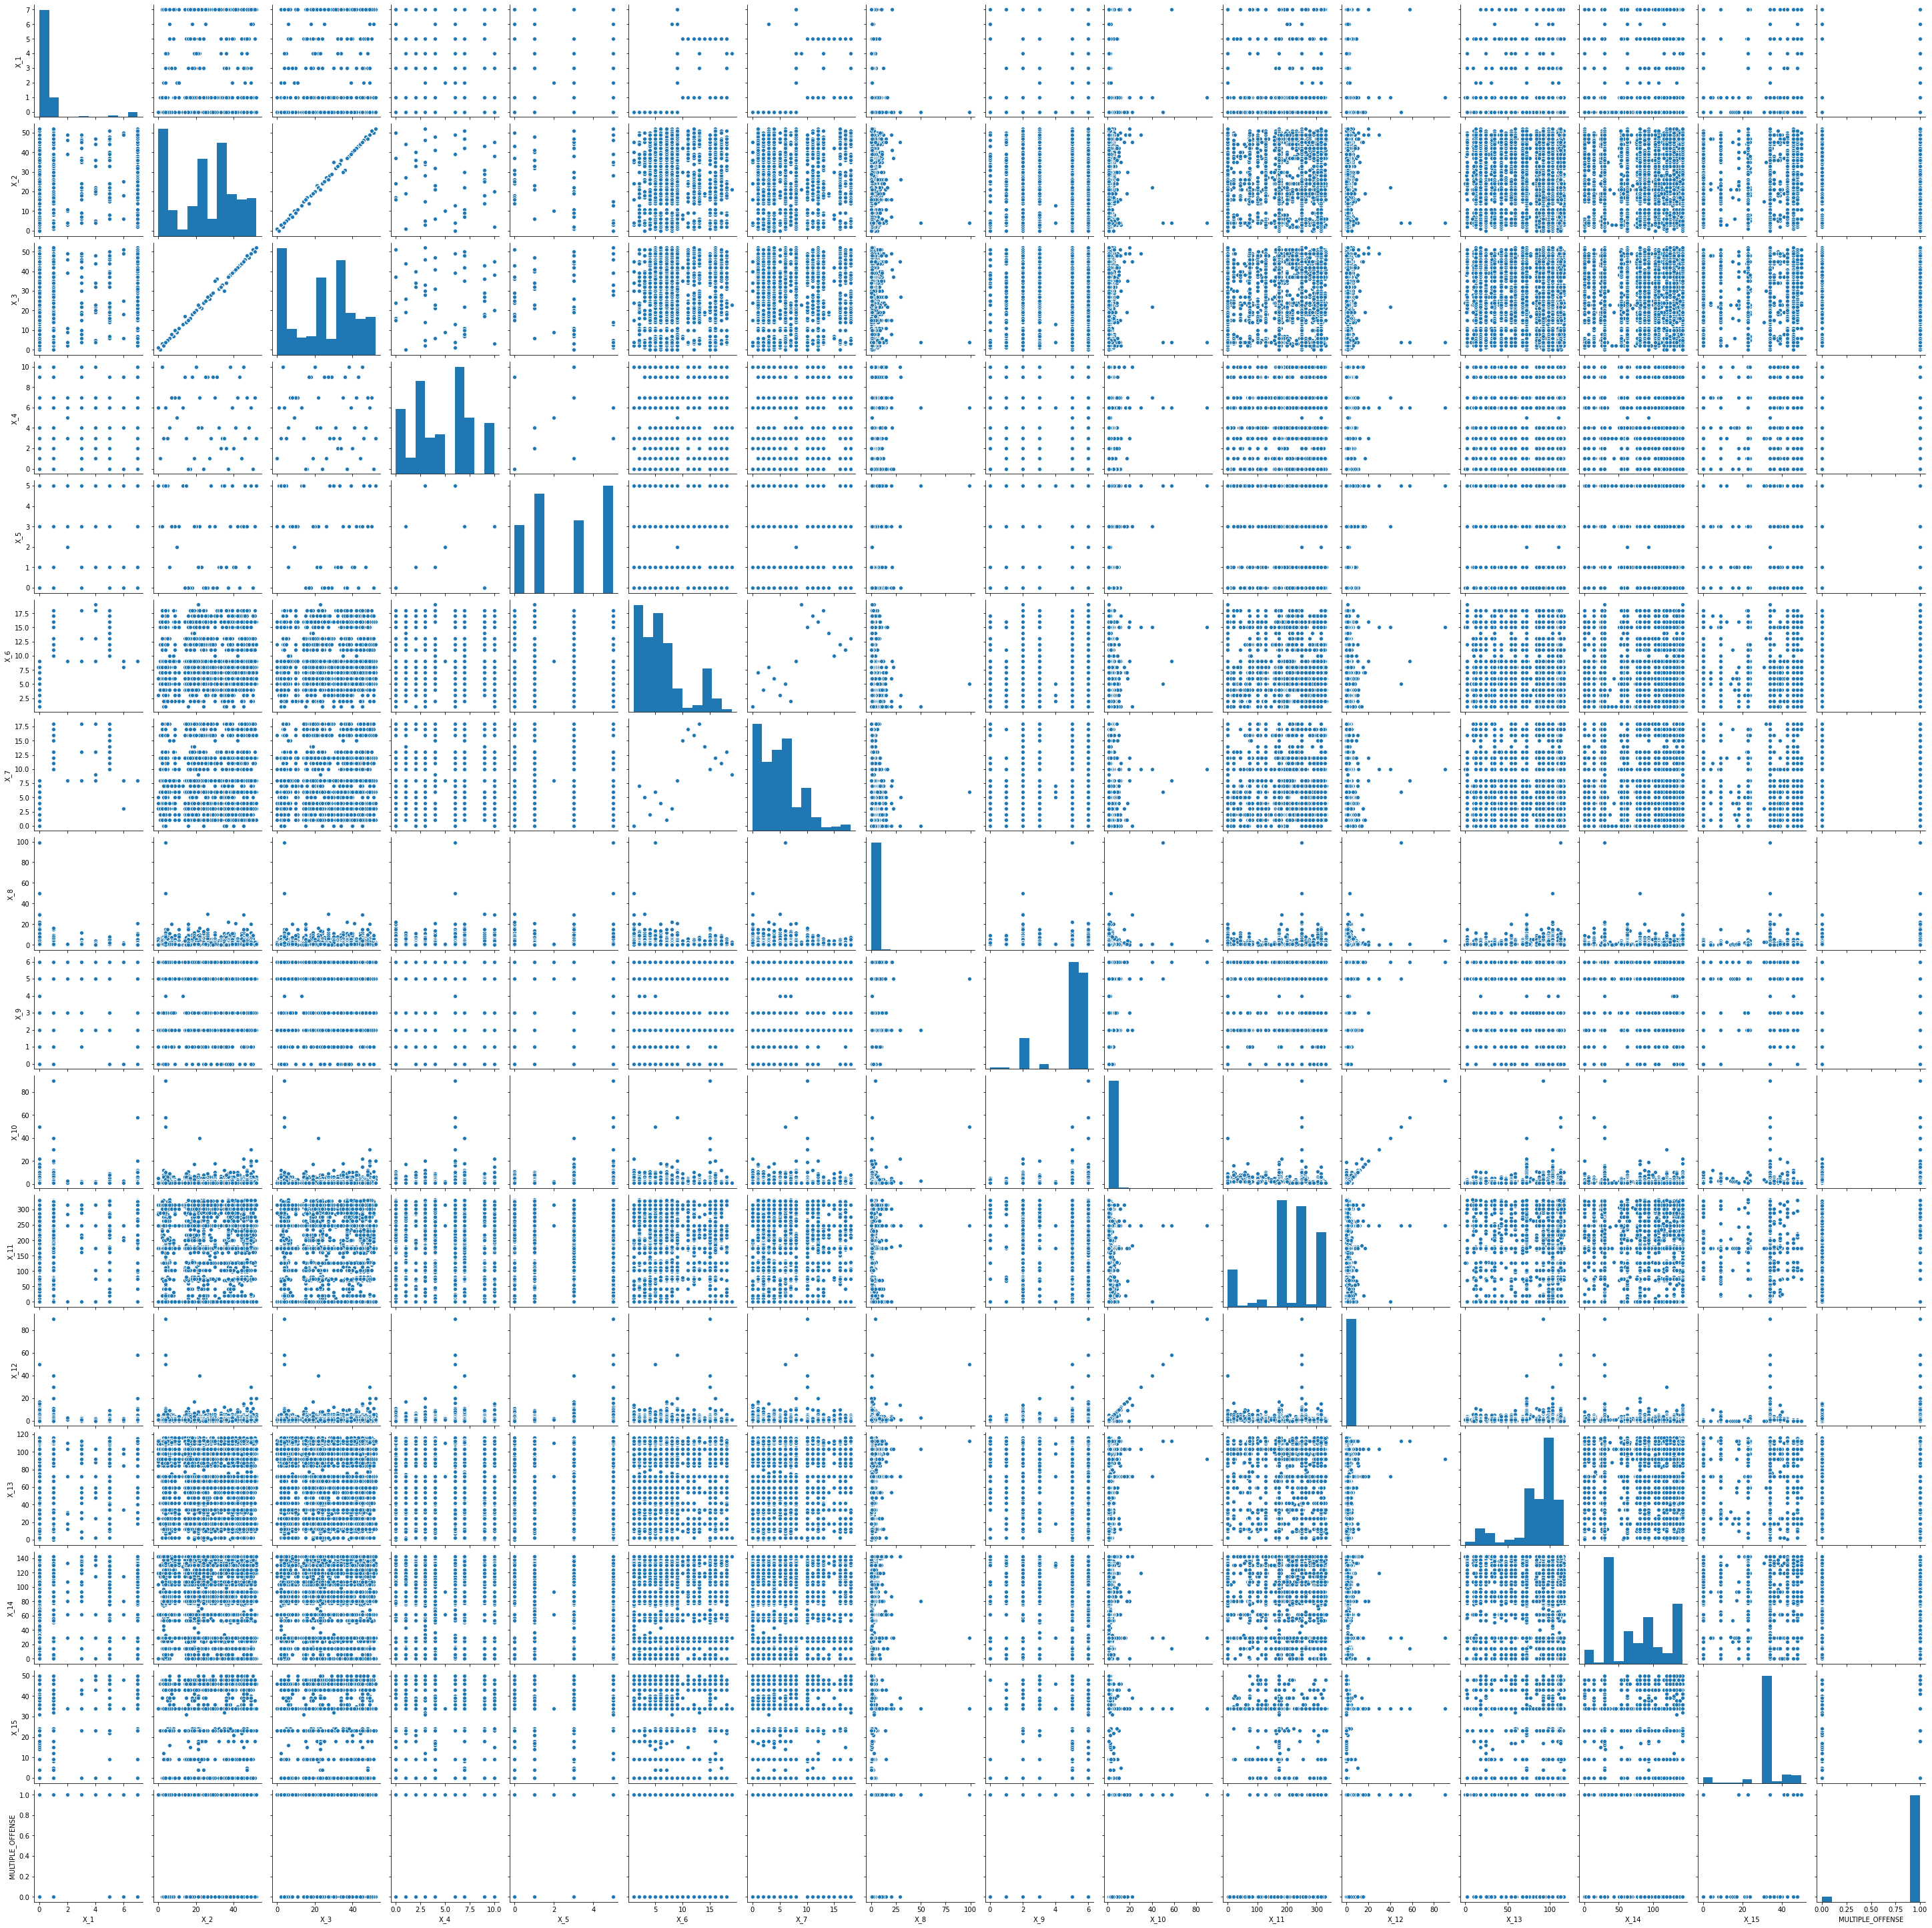

In [19]:
sns.pairplot(train)

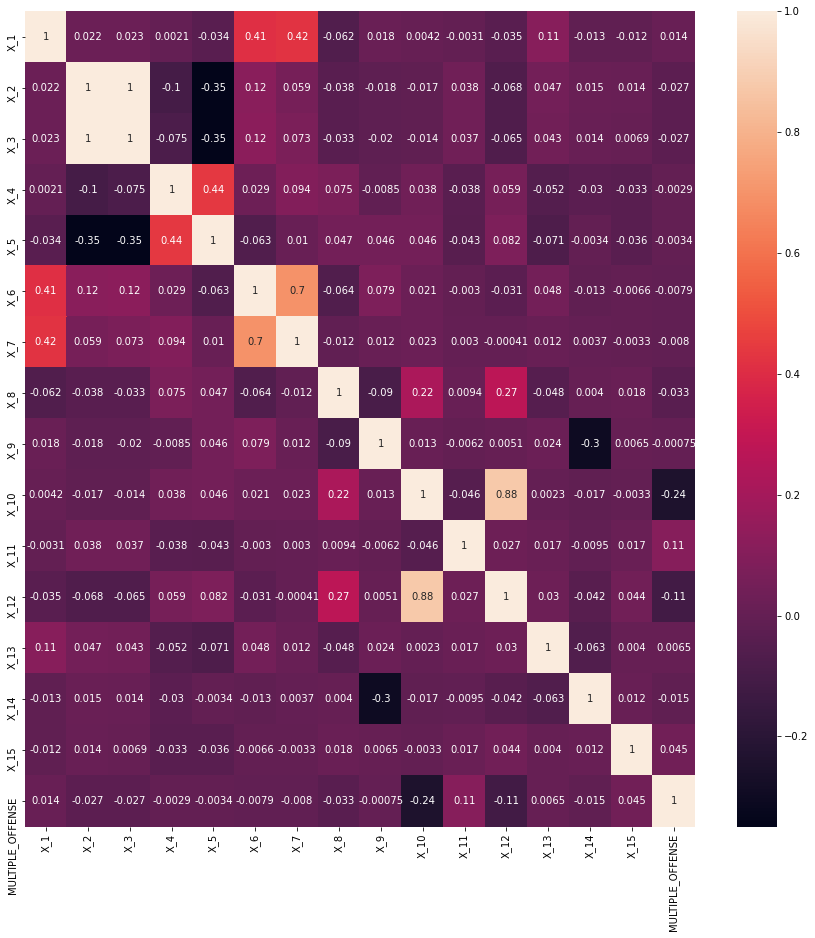

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True)

There is a strong correlation between following pairs:  
1.X_10 and X_12  
2.X_2 and X_3  
3.X_7 and X_6  
Since there is a strong between pair of vairables we will try to eliminate a variable from the pair as follows:  
select X_10 or X_12 from (X_10,X_12) and X_3 or X_2 from (X_3,X_2) and X_7 or X_6 from (X_7,X_6)

In [21]:
train['DATE'].dt.year.value_counts()

2001    1186
1996    1040
2000    1016
2006     989
1993     962
1997     952
1998     947
2008     941
2007     903
2004     897
2003     890
2017     884
2005     873
1999     865
2002     844
1995     838
2012     823
2018     816
1992     792
2010     783
2009     776
2011     759
2016     743
1994     724
2015     720
2013     703
2014     678
1991     512
Name: DATE, dtype: int64

In [23]:
test['DATE'].dt.year.value_counts()

2001    738
1996    712
2000    669
1997    665
2008    661
1995    652
2007    648
1999    633
2004    624
2003    599
2002    594
1998    589
2017    586
2005    586
2006    572
1993    570
2018    551
2011    533
2009    516
1992    511
2010    508
2012    487
2014    476
2016    471
1994    468
2015    462
2013    455
1991    367
Name: DATE, dtype: int64

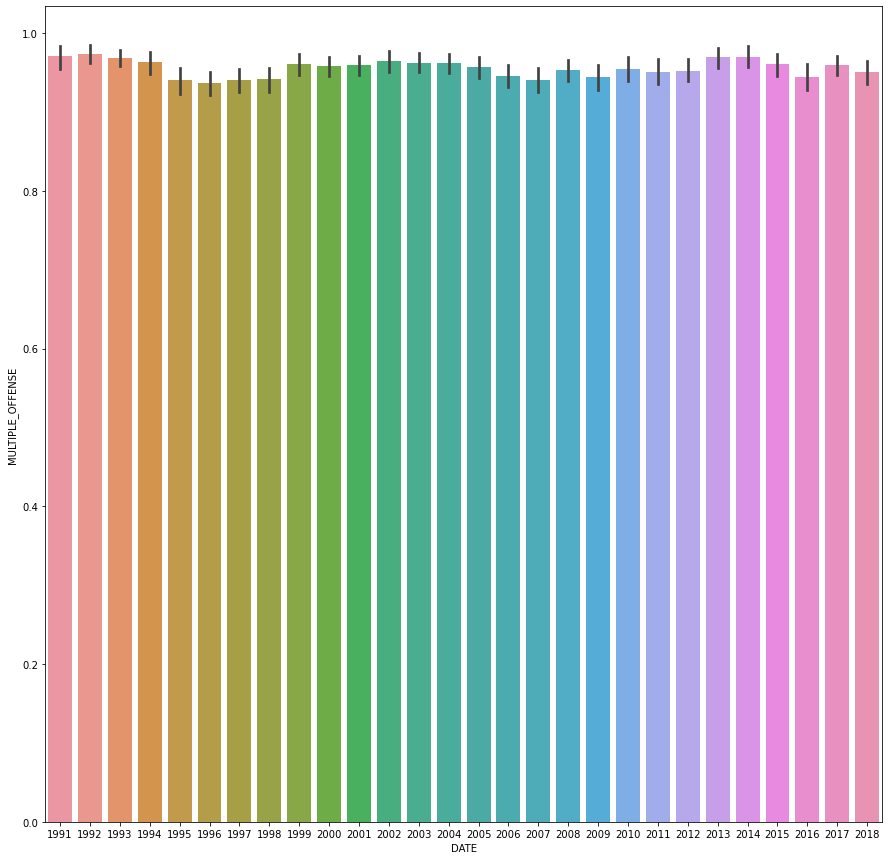

In [25]:
plt.figure(figsize=(15,15))
sns.barplot(train['DATE'].dt.year,train['MULTIPLE_OFFENSE'])

In [26]:
train[['DATE','MULTIPLE_OFFENSE']].groupby(by=train['DATE'].dt.year).sum().sort_values(by='MULTIPLE_OFFENSE',ascending=False)

,MULTIPLE_OFFENSE
DATE,
2001,1138
1996,974
2000,974
2006,936
1993,932
2008,897
1997,895
1998,892
2004,863


From above run we could interpret that Year '2001' has the most hacks followed by 1996 and 2000

</br>

In [27]:
#train_bkup=train.copy()
#test_bkup=test.copy()

X_10 or X_12 from (X_10,X_12) and X_3 or X_2 from (X_3,X_2) and X_7 or X_6 from (X_7,X_6)  
We select X_10,X_2 and X_6.Dropping X_7,X_3 and X_12.

In [28]:
train.drop(['X_3','X_12','X_7'],axis=1,inplace=True)
test.drop(['X_3','X_12','X_7'],axis=1,inplace=True)

In [29]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_4,X_5,X_6,X_8,X_9,X_10,X_11,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,2004-07-04,0,36,2,1,5,1,6,1,174,92,29,36,0
1,CR_189752,2017-07-18,1,37,0,0,11,1,6,1,236,103,142,34,1
2,CR_184637,2017-03-15,0,3,3,5,1,2,3,1,174,110,93,34,1
3,CR_139071,2009-02-13,0,33,2,1,7,1,6,1,249,72,29,34,1
4,CR_109335,2005-04-13,0,33,2,1,8,0,5,1,174,112,29,43,1


</br>

<b>-------------------------------------------------------------------------------------------------------------------------------</b>  

# KMeans

<b>Finding patterns within X_1-X_15 logging parameters</b>

Logging parameters are not straight away giving out how it impacts the target, we could find a way to cluster the  parameters which act in a specific way so that hack happens or not.Using KMeans to cluster the data points.

In [30]:
Ktrain=train.iloc[:,2:14]
Ktest=test.iloc[:,2:14]

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
sc=StandardScaler()
sc_Ktrain=sc.fit_transform(Ktrain)

In [32]:
wss=[]
for i in range(1,15):
    km=KMeans(n_clusters=i)
    km.fit(sc_Ktrain)
    wss.append(km.inertia_)
wss

[286272.0,
 254296.27949749664,
 231909.82831998492,
 214914.0548649458,
 198726.73198029114,
 183692.4881087169,
 174376.73526945725,
 165474.35755189133,
 155905.52843553797,
 150620.81101333126,
 143633.84559156848,
 139024.72797801418,
 136413.26299779493,
 130593.75085094498]

Text(0, 0.5, 'WSS(Within Sum of squares)')

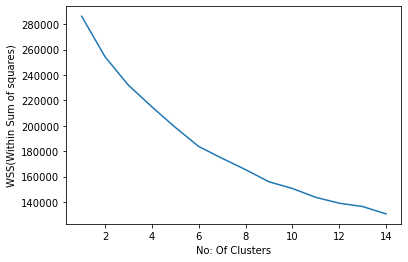

In [623]:
plt.plot(range(1,15),wss)
plt.xlabel('No: Of Clusters')
plt.ylabel('WSS(Within Sum of squares)')

Elbow plot to select the no: of cluster to train the model.Here we are unable to see a clear drop of variance.Here we select 7 as no: of clusters.  

In [34]:
km=KMeans(n_clusters=7)
km.fit(sc_Ktrain)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
Ktrain['Clusters']=km.labels_

In [90]:
Ktrain.to_csv('D:\\ANALYTICS\\HACKATHONS\\Hackerearth-Novartis\\Ktrain_cluster_logpara.csv')

In [36]:
Ktrain['Target']=train['MULTIPLE_OFFENSE']

In [37]:
Ktrain.head(20)

,X_1,X_2,X_4,X_5,X_6,X_8,X_9,X_10,X_11,X_13,X_14,X_15,Clusters,Target
0,0,36,2,1,5,1,6,1,174,92,29,36,1,0
1,1,37,0,0,11,1,6,1,236,103,142,34,1,1
2,0,3,3,5,1,2,3,1,174,110,93,34,2,1
3,0,33,2,1,7,1,6,1,249,72,29,34,1,1
4,0,33,2,1,8,0,5,1,174,112,29,43,1,1
5,0,45,10,3,1,1,6,1,303,72,62,34,3,1
6,0,30,7,3,7,0,5,1,174,112,29,43,3,1
7,0,8,7,3,9,0,5,1,316,72,62,34,2,1
8,0,49,6,5,8,1,1,1,316,103,14,34,5,1
9,1,4,6,5,15,0,5,2,145,103,29,34,0,0


In [38]:
Ktrain.tail(20)

,X_1,X_2,X_4,X_5,X_6,X_8,X_9,X_10,X_11,X_13,X_14,X_15,Clusters,Target
23836,0,36,2,1,1,0,5,1,174,92,93,34,1,1
23837,0,4,6,5,1,0,5,1,249,103,29,34,2,1
23838,0,5,3,5,2,1,6,3,0,24,80,34,2,1
23839,0,33,2,1,6,1,6,1,249,59,29,34,1,1
23840,0,4,6,5,1,0,5,1,174,72,93,34,2,1
23841,1,4,6,5,15,1,2,1,316,67,62,34,0,1
23842,0,21,4,1,2,1,6,1,316,72,29,34,1,1
23843,0,3,3,5,4,1,6,1,249,72,80,34,2,1
23844,1,4,6,5,15,0,5,1,174,18,133,46,0,1
23845,0,49,6,5,5,1,6,1,249,111,62,34,3,1


Unable to cluster meaningfully.Here we fail to find pattern/relation within logging parameters in a cluster.This might be due to Unbalanced   Data.  Large proportion of 1(95%) when compared to 0(5%)

<b>-------------------------------------------------------------------------------------------------------------------------------</b>  

</br>

# Model Build and Performance

Extracting only year to 'DATE' column

In [41]:
train['DATE']=train['DATE'].dt.year

In [43]:
test['DATE']=test['DATE'].dt.year

In [45]:
x_train=train.drop(['INCIDENT_ID','MULTIPLE_OFFENSE'],axis=1)
y_train=train['MULTIPLE_OFFENSE']
x_test=test.drop('INCIDENT_ID',axis=1)
test_incid=test['INCIDENT_ID']

## Parametric Models

<b>Gaussian Naive Bayes</b>

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [543]:
gnb=GaussianNB()

In [544]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [595]:
y_train_predict = gnb.predict(x_train)
gnb_score = gnb.score(x_train, y_train)
clas_report=metrics.classification_report(y_train,y_train_predict)
print('ACCURACY SCORE')
print('-'*20)
print(gnb_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(metrics.classification_report(y_train, y_train_predict))

ACCURACY SCORE
--------------------
0.9495305164319249
 
 
CONFUSION MATRIX
--------------------
[[  110   958]
 [  246 22542]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.31      0.10      0.15      1068
           1       0.96      0.99      0.97     22788

    accuracy                           0.95     23856
   macro avg       0.63      0.55      0.56     23856
weighted avg       0.93      0.95      0.94     23856



In [546]:
clas_report_gnb=metrics.classification_report(y_train,y_train_predict,output_dict=True)
gnb_train_recall_zero=clas_report_gnb['0']['recall']
gnb_train_recall_one=clas_report_gnb['1']['recall']
gnb_score=gnb.score(x_train,y_train)

AUC: 0.853


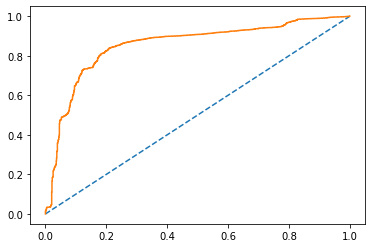

In [547]:
# predict probabilities
probs=gnb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gnb_train_auc = metrics.roc_auc_score(y_train, probs)
print('AUC: %.3f' % gnb_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

<b>Linear Discriminant Analysis</b>

In [553]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()

In [554]:
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [597]:
y_train_predict = lda.predict(x_train)
lda_score = lda.score(x_train, y_train)
clas_report=metrics.classification_report(y_train,y_train_predict)
print('ACCURACY SCORE')
print('-'*20)
print(lda_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(metrics.classification_report(y_train, y_train_predict))

ACCURACY SCORE
--------------------
0.9533031522468142
 
 
CONFUSION MATRIX
--------------------
[[   80   988]
 [  126 22662]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.39      0.07      0.13      1068
           1       0.96      0.99      0.98     22788

    accuracy                           0.95     23856
   macro avg       0.67      0.53      0.55     23856
weighted avg       0.93      0.95      0.94     23856



In [556]:
clas_report_lda=metrics.classification_report(y_train,y_train_predict,output_dict=True)
lda_train_recall_zero=clas_report_lda['0']['recall']
lda_train_recall_one=clas_report_lda['1']['recall']
lda_score=lda.score(x_train,y_train)

AUC: 0.904


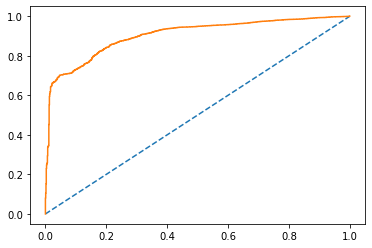

In [557]:
# predict probabilities
probs=lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

## Non-Parametric Models

<b>Support Vector Machine</b>

In [50]:
from sklearn import svm

In [548]:
svc=svm.SVC(probability=True)

In [549]:
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [596]:
y_train_predict = svc.predict(x_train)
svc_score = svc.score(x_train, y_train)
clas_report=metrics.classification_report(y_train,y_train_predict)
print('ACCURACY SCORE')
print('-'*20)
print(svc_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(metrics.classification_report(y_train, y_train_predict))

ACCURACY SCORE
--------------------
0.9552313883299799
 
 
CONFUSION MATRIX
--------------------
[[    0  1068]
 [    0 22788]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1068
           1       0.96      1.00      0.98     22788

    accuracy                           0.96     23856
   macro avg       0.48      0.50      0.49     23856
weighted avg       0.91      0.96      0.93     23856



In [551]:
clas_report_svc=metrics.classification_report(y_train,y_train_predict,output_dict=True)
svc_train_recall_zero=clas_report_svc['0']['recall']
svc_train_recall_one=clas_report_svc['1']['recall']
svc_score=svc.score(x_train,y_train)

AUC: 0.453


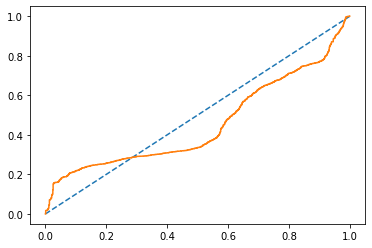

In [552]:
# predict probabilities
probs=svc.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svc_train_auc = metrics.roc_auc_score(y_train, probs)
print('AUC: %.3f' % svc_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

<b>ANN</b>

In [57]:
from sklearn.neural_network import MLPClassifier

In [558]:
ann=MLPClassifier(hidden_layer_sizes=(100,100))
ann.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [598]:
y_train_predict = ann.predict(x_train)
ann_score = ann.score(x_train, y_train)
clas_report=metrics.classification_report(y_train,y_train_predict)
print('ACCURACY SCORE')
print('-'*20)
print(ann_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(metrics.classification_report(y_train, y_train_predict))

ACCURACY SCORE
--------------------
0.9550637156270959
 
 
CONFUSION MATRIX
--------------------
[[    1  1067]
 [    5 22783]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.17      0.00      0.00      1068
           1       0.96      1.00      0.98     22788

    accuracy                           0.96     23856
   macro avg       0.56      0.50      0.49     23856
weighted avg       0.92      0.96      0.93     23856



In [560]:
clas_report_ann=metrics.classification_report(y_train,y_train_predict,output_dict=True)
ann_train_recall_zero=clas_report_ann['0']['recall']
ann_train_recall_one=clas_report_ann['1']['recall']
ann_score=ann.score(x_train,y_train)

AUC: 0.912


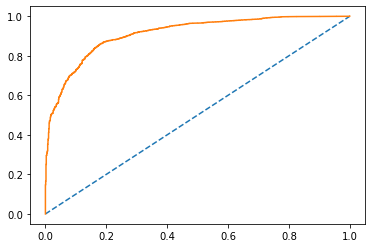

In [561]:
# predict probabilities
probs=ann.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_train_auc = metrics.roc_auc_score(y_train, probs)
print('AUC: %.3f' % ann_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

<b>Adaptive Boosting Classifier</b>

In [562]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [563]:
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [599]:
y_train_predict = ada.predict(x_train)
ada_score = ada.score(x_train, y_train)
clas_report=metrics.classification_report(y_train,y_train_predict)
print('ACCURACY SCORE')
print('-'*20)
print(knn_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(metrics.classification_report(y_train, y_train_predict))

ACCURACY SCORE
--------------------
0.9743041582830315
 
 
CONFUSION MATRIX
--------------------
[[ 1007    61]
 [   28 22760]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1068
           1       1.00      1.00      1.00     22788

    accuracy                           1.00     23856
   macro avg       0.99      0.97      0.98     23856
weighted avg       1.00      1.00      1.00     23856



In [565]:
clas_report_ada=metrics.classification_report(y_train,y_train_predict,output_dict=True)
ada_train_recall_zero=clas_report_ada['0']['recall']
ada_train_recall_one=clas_report_ada['1']['recall']
ada_score=ada.score(x_train,y_train)

AUC: 1.000


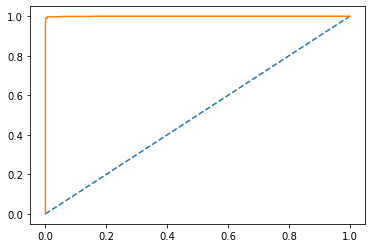

In [566]:
# predict probabilities
probs=ada.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_train_auc = metrics.roc_auc_score(y_train, probs)
print('AUC: %.3f' % ada_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

<b>XGBoost Classifier</b>

In [567]:
import xgboost as xgb 

In [568]:
xgb=xgb.XGBClassifier()

In [569]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [600]:
y_train_predict = xgb.predict(x_train)
xgb_score = xgb.score(x_train, y_train)
clas_report=metrics.classification_report(y_train,y_train_predict)
print('ACCURACY SCORE')
print('-'*20)
print(xgb_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(' ')
print(' ')
print('CLASSIFICATION REOPORT')
print('-'*20)
print(metrics.classification_report(y_train, y_train_predict))

ACCURACY SCORE
--------------------
1.0
 
 
CONFUSION MATRIX
--------------------
[[ 1068     0]
 [    0 22788]]
 
 
CLASSIFICATION REOPORT
--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00     22788

    accuracy                           1.00     23856
   macro avg       1.00      1.00      1.00     23856
weighted avg       1.00      1.00      1.00     23856



In [571]:
clas_report_xgb=metrics.classification_report(y_train,y_train_predict,output_dict=True)
xgb_train_recall_zero=clas_report_xgb['0']['recall']
xgb_train_recall_one=clas_report_xgb['1']['recall']
xgb_score=xgb.score(x_train,y_train)

AUC: 1.000


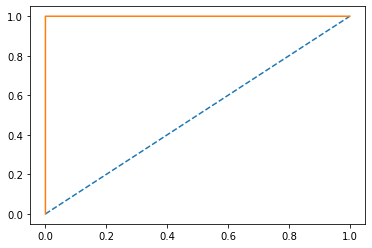

In [572]:
# predict probabilities
probs=xgb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_train_auc = metrics.roc_auc_score(y_train, probs)
print('AUC: %.3f' % xgb_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

<b>K Nearest Neighbours Classifier</b>

In [573]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [574]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [601]:
y_train_predict = knn.predict(x_train)
knn_score = knn.score(x_train, y_train)
clas_report=metrics.classification_report(y_train,y_train_predict)
print('ACCURACY SCORE')
print('-'*20)
print(knn_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(metrics.classification_report(y_train, y_train_predict))

ACCURACY SCORE
--------------------
0.9743041582830315
 
 
CONFUSION MATRIX
[[  508   560]
 [   53 22735]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.91      0.48      0.62      1068
           1       0.98      1.00      0.99     22788

    accuracy                           0.97     23856
   macro avg       0.94      0.74      0.81     23856
weighted avg       0.97      0.97      0.97     23856



In [576]:
clas_report_knn=metrics.classification_report(y_train,y_train_predict,output_dict=True)
knn_train_recall_zero=clas_report_knn['0']['recall']
knn_train_recall_one=clas_report_knn['1']['recall']
knn_score=knn.score(x_train,y_train)

AUC: 0.991


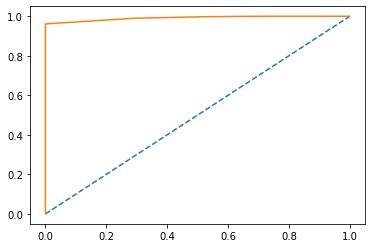

In [577]:
# predict probabilities
probs=knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = metrics.roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

<b>Decision Tree Classifier</b>

In [578]:
from sklearn.tree import DecisionTreeClassifier
dcl=DecisionTreeClassifier()

In [579]:
dcl.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [602]:
y_train_predict = dcl.predict(x_train)
dcll_score = dcl.score(x_train, y_train)
clas_report=metrics.classification_report(y_train,y_train_predict)
print('ACCURACY SCORE')
print('-'*20)
print(dcl_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(metrics.classification_report(y_train, y_train_predict))

ACCURACY SCORE
--------------------
1.0
 
 
CONFUSION MATRIX
--------------------
[[ 1068     0]
 [    0 22788]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00     22788

    accuracy                           1.00     23856
   macro avg       1.00      1.00      1.00     23856
weighted avg       1.00      1.00      1.00     23856



In [581]:
clas_report_dcl=metrics.classification_report(y_train,y_train_predict,output_dict=True)
dcl_train_recall_zero=clas_report_dcl['0']['recall']
dcl_train_recall_one=clas_report_dcl['1']['recall']
dcl_score=dcl.score(x_train,y_train)

AUC: 1.000


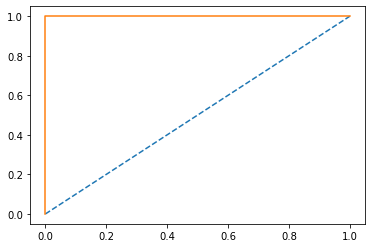

In [582]:
# predict probabilities
probs=dcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dcl_train_auc = metrics.roc_auc_score(y_train, probs)
print('AUC: %.3f' % dcl_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

<b>Random Forest Classifier</b>

In [583]:
from sklearn.ensemble import RandomForestClassifier
rcl=RandomForestClassifier()

In [584]:
rcl.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [603]:
y_train_predict = rcl.predict(x_train)
rcl_score = rcl.score(x_train, y_train)
clas_report=metrics.classification_report(y_train,y_train_predict)
print('ACCURACY SCORE')
print('-'*20)
print(rcl_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(metrics.classification_report(y_train, y_train_predict))

ACCURACY SCORE
--------------------
1.0
 
 
CONFUSION MATRIX
--------------------
[[ 1068     0]
 [    0 22788]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00     22788

    accuracy                           1.00     23856
   macro avg       1.00      1.00      1.00     23856
weighted avg       1.00      1.00      1.00     23856



In [586]:
clas_report_rcl=metrics.classification_report(y_train,y_train_predict,output_dict=True)
rcl_train_recall_zero=clas_report_rcl['0']['recall']
rcl_train_recall_one=clas_report_rcl['1']['recall']
rcl_score=rcl.score(x_train,y_train)

AUC: 1.000


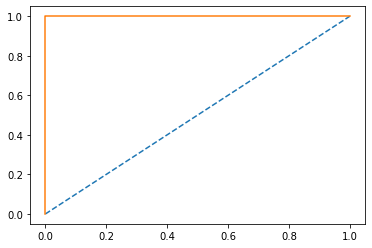

In [587]:
# predict probabilities
probs=rcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rcl_train_auc = metrics.roc_auc_score(y_train, probs)
print('AUC: %.3f' % rcl_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

<b>Bagging Classifier</b>

In [588]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(base_estimator=dcl,n_estimators=100,random_state=1)
bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [604]:
y_train_predict = bag.predict(x_train)
bag_score = bag.score(x_train, y_train)
clas_report=metrics.classification_report(y_train,y_train_predict)
print('ACCURACY SCORE')
print(bag_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(metrics.classification_report(y_train, y_train_predict))

ACCURACY SCORE
1.0
 
 
CONFUSION MATRIX
--------------------
[[ 1068     0]
 [    0 22788]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00     22788

    accuracy                           1.00     23856
   macro avg       1.00      1.00      1.00     23856
weighted avg       1.00      1.00      1.00     23856



In [590]:
clas_report_bag=metrics.classification_report(y_train,y_train_predict,output_dict=True)
bag_train_recall_zero=clas_report_bag['0']['recall']
bag_train_recall_one=clas_report_bag['1']['recall']
bag_score=bag.score(x_train,y_train)

AUC: 1.000


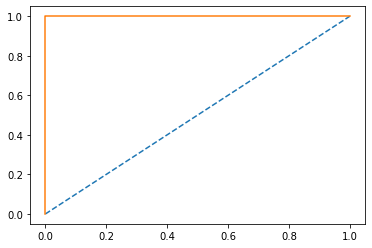

In [591]:
# predict probabilities
probs=bag.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = metrics.roc_auc_score(y_train, probs)
print('AUC: %.3f' % bag_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

In [592]:
index=['Accuracy', 'AUC', 'Recall_zero','Recall_one']
df_score = pd.DataFrame({'GaussianNB':[gnb_score,gnb_train_auc,gnb_train_recall_zero,gnb_train_recall_one],
        'SVM':[svc_score,svc_train_auc,svc_train_recall_zero,svc_train_recall_one],
       'LDA':[lda_score,lda_train_auc,lda_train_recall_zero,lda_train_recall_one],
        'ANN':[ann_score,ann_train_auc,ann_train_recall_zero,ann_train_recall_one],
       'KNN':[knn_score,knn_train_auc,knn_train_recall_zero,knn_train_recall_one],
        'AdaBoost':[ada_score,ada_train_auc,ada_train_recall_zero,ada_train_recall_one],
         'XGBoost':[xgb_score,xgb_train_auc,xgb_train_recall_zero,xgb_train_recall_one],
         'Decision Tree':[dcl_score,dcl_train_auc,dcl_train_recall_zero,dcl_train_recall_one],                             
         'RF':[rcl_score,rcl_train_auc,rcl_train_recall_zero,rcl_train_recall_one],
         'Bagging':[bag_score,bag_train_auc,bag_train_recall_zero,bag_train_recall_zero]},index=index)

In [593]:
round(df_score,2)

,GaussianNB,SVM,LDA,ANN,KNN,AdaBoost,XGBoost,Decision Tree,RF,Bagging
Accuracy,0.95,0.96,0.95,0.96,0.97,1.00,1.0,1.0,1.0,1.0
AUC,0.85,0.45,0.90,0.91,0.99,1.00,1.0,1.0,1.0,1.0
Recall_zero,0.10,0.00,0.07,0.00,0.48,0.94,1.0,1.0,1.0,1.0
Recall_one,0.99,1.00,0.99,1.00,1.00,1.00,1.0,1.0,1.0,1.0


1.All models has pretty much good accuracy.      
2.Recall(zero class) for GaussianNb to KNN is poor,while from AdaBoost to Bagging Recall is excellent.    
3.Recall(one class) is excellent for model i.e. all model shines in predicting hack while it does very bad job in predicting the non hacked data.    
4.The huge difference between recall between classes would be due to Class Imbalance as we saw earlier in EDA part.    
5.Class Imbalance has made model to perform well on '1'.    
6.Parametric Models performed below par while non parametric models(apart from SVM,KNN,ANN) performed well and has an excellent recall for both class '1' and '0' i.e. it is able to predict the actual true data points as true.  
7.We will find out whether we could increase performance of the models by introducing synthetic data in the next part.

<b>-------------------------------------------------------------------------------------------------------------------------------</b>

# Applying SMOTE

Apply SMOTE on train set and apply on all model

In [78]:
from imblearn.over_sampling import SMOTE

In [270]:
sm=SMOTE(random_state=1)

In [80]:
x_train_sm,y_train_sm=sm.fit_sample(x_train,y_train)

</br>

## Parametric Model

<b>Gaussian Naive Bayes with SMOTE</b>

In [473]:
gnb.fit(x_train_sm,y_train_sm)

GaussianNB(priors=None, var_smoothing=1e-09)

In [523]:
clas_report_gnb=metrics.classification_report(y_train_sm,y_pred_gnb,output_dict=True)

In [524]:
gnb_train_recall_zero=clas_report_gnb['0']['recall']
gnb_train_recall_one=clas_report_gnb['1']['recall']
gnb_score=gnb.score(x_train_sm,y_train_sm)

In [477]:
y_pred_gnb=gnb.predict(x_train_sm)
conf_matrix=metrics.confusion_matrix(y_train_sm,y_pred_gnb)
clas_report_gnb=metrics.classification_report(y_train_sm,y_pred_gnb)#,output_dict=True)
print('ACCURACY SCORE')
print('-'*20)
print(gnb_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(conf_matrix)
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(clas_report_gnb)

ACCURACY SCORE
--------------------
0.7592592592592593
 
 
CONFUSION MATRIX
--------------------
[[19734  3054]
 [ 7918 14870]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.71      0.87      0.78     22788
           1       0.83      0.65      0.73     22788

    accuracy                           0.76     45576
   macro avg       0.77      0.76      0.76     45576
weighted avg       0.77      0.76      0.76     45576



AUC: 0.867


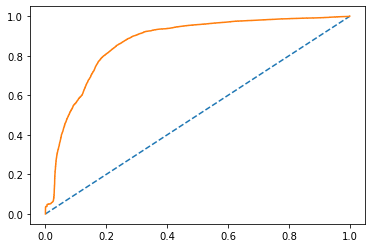

In [478]:
# predict probabilities
probs=gnb.predict_proba(x_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gnb_train_auc = metrics.roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % gnb_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

</br>

</br>

<b>Linear Discriminant Analysis with SMOTE</b>

In [484]:
lda=LinearDiscriminantAnalysis(tol=.001)
lda.fit(x_train_sm,y_train_sm)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.001)

In [527]:
clas_report_lda=metrics.classification_report(y_train_sm,y_pred_lda,output_dict=True)

In [528]:
lda_train_recall_zero=clas_report_lda['0']['recall']
lda_train_recall_one=clas_report_lda['1']['recall']
lda_score=lda.score(x_train_sm,y_train_sm)

In [487]:
y_pred_lda=lda.predict(x_train_sm)
conf_matrix=metrics.confusion_matrix(y_train_sm,y_pred_lda)
clas_report_lda=metrics.classification_report(y_train_sm,y_pred_lda)#,output_dict=True)
print('ACCURACY SCORE')
print('-'*20)
print(lda_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(conf_matrix)
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(clas_report_lda)

ACCURACY SCORE
--------------------
0.7845357205546779
 
 
CONFUSION MATRIX
--------------------
[[16980  5808]
 [ 4012 18776]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.81      0.75      0.78     22788
           1       0.76      0.82      0.79     22788

    accuracy                           0.78     45576
   macro avg       0.79      0.78      0.78     45576
weighted avg       0.79      0.78      0.78     45576



AUC: 0.873


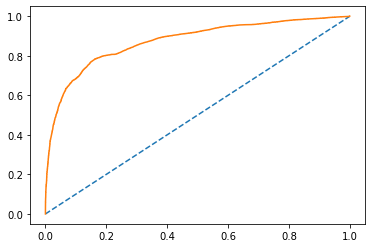

In [488]:
# predict probabilities
probs=lda.predict_proba(x_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

## Non-Parametric Models

<b>Support Vector Machine with SMOTE</b> 

In [479]:
svc=svm.SVC(C=10,gamma=.001,max_iter=600,probability=True)
svc.fit(x_train_sm,y_train_sm)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=600, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [525]:
clas_report_svc=metrics.classification_report(y_train_sm,y_pred_svc,output_dict=True)

In [526]:
svc_train_recall_zero=clas_report_svc['0']['recall']
svc_train_recall_one=clas_report_svc['1']['recall']
svc_score=svc.score(x_train_sm,y_train_sm)

In [482]:
y_pred_svc=svc.predict(x_train_sm)
conf_matrix=metrics.confusion_matrix(y_train_sm,y_pred_svc)
clas_report_svc=metrics.classification_report(y_train_sm,y_pred_svc)#,output_dict=True)
print('ACCURACY SCORE')
print('-'*20)
print(svc_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(conf_matrix)
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(clas_report_svc)

ACCURACY SCORE
--------------------
0.7935755660874144
 
 
CONFUSION MATRIX
--------------------
[[17015  5773]
 [ 3635 19153]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.82      0.75      0.78     22788
           1       0.77      0.84      0.80     22788

    accuracy                           0.79     45576
   macro avg       0.80      0.79      0.79     45576
weighted avg       0.80      0.79      0.79     45576



AUC: 0.886


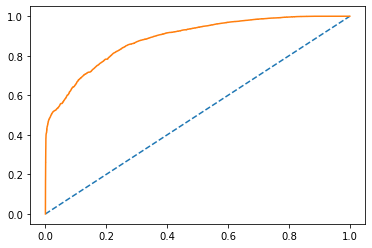

In [483]:
# predict probabilities
probs=svc.predict_proba(x_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svc_train_auc = metrics.roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % svc_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

</br>

<b>ANN with SMOTE</b>

In [489]:
ann.fit(x_train_sm,y_train_sm)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [529]:
clas_report_ann=metrics.classification_report(y_train_sm,y_pred_ann,output_dict=True)

In [530]:
ann_train_recall_zero=clas_report_ann['0']['recall']
ann_train_recall_one=clas_report_ann['1']['recall']
ann_score=ann.score(x_train_sm,y_train_sm)

In [492]:
y_pred_ann=ann.predict(x_train_sm)
conf_matrix=metrics.confusion_matrix(y_train_sm,y_pred_ann)
clas_report_ann=metrics.classification_report(y_train_sm,y_pred_ann)#,output_dict=True)
print('ACCURACY SCORE')
print('-'*20)
print(ann_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(conf_matrix)
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(clas_report_ann)

ACCURACY SCORE
--------------------
0.9727707565385291
 
 
CONFUSION MATRIX
--------------------
[[22568   220]
 [ 1021 21767]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     22788
           1       0.99      0.96      0.97     22788

    accuracy                           0.97     45576
   macro avg       0.97      0.97      0.97     45576
weighted avg       0.97      0.97      0.97     45576



AUC: 0.996


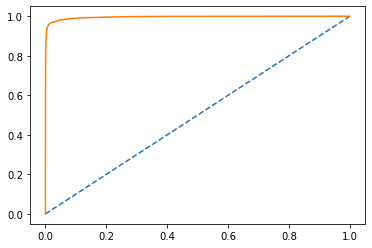

In [493]:
# predict probabilities
probs=ann.predict_proba(x_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_train_auc = metrics.roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % ann_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

</br>

<b>K Nearest Neighbours with SMOTE</b>

In [494]:
knn.fit(x_train_sm,y_train_sm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [531]:
clas_report_knn=metrics.classification_report(y_train_sm,y_pred_knn,output_dict=True)

In [532]:
knn_train_recall_zero=clas_report_knn['0']['recall']
knn_train_recall_one=clas_report_knn['1']['recall']
knn_score=knn.score(x_train_sm,y_train_sm)

In [497]:
y_pred_knn=knn.predict(x_train_sm)
conf_matrix=metrics.confusion_matrix(y_train_sm,y_pred_knn)
clas_report_knn=metrics.classification_report(y_train_sm,y_pred_knn)#,output_dict=True)
print('ACCURACY SCORE')
print('-'*20)
print(knn_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(conf_matrix)
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(clas_report_knn)

ACCURACY SCORE
--------------------
0.9854748113041952
 
 
CONFUSION MATRIX
--------------------
[[22778    10]
 [  652 22136]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     22788
           1       1.00      0.97      0.99     22788

    accuracy                           0.99     45576
   macro avg       0.99      0.99      0.99     45576
weighted avg       0.99      0.99      0.99     45576



AUC: 1.000


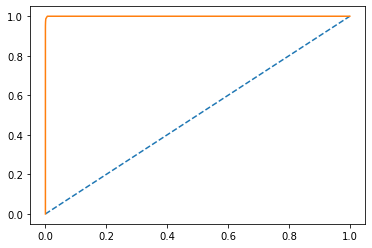

In [498]:
# predict probabilities
probs=knn.predict_proba(x_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = metrics.roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

</br>

<b>Adaptive Boostin with SMOTE</b>

In [499]:
ada.fit(x_train_sm,y_train_sm)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [533]:
clas_report_ada=metrics.classification_report(y_train_sm,y_pred_ada,output_dict=True)
ada_train_recall_zero=clas_report_ada['0']['recall']
ada_train_recall_one=clas_report_ada['1']['recall']
ada_score=ada.score(x_train_sm,y_train_sm)

In [501]:
y_pred_ada=ada.predict(x_train_sm)
ada_score=ada.score(x_train_sm,y_train_sm)
conf_matrix=metrics.confusion_matrix(y_train_sm,y_pred_ada)
clas_report_ada=metrics.classification_report(y_train_sm,y_pred_ada)#,output_dict=True)
print('ACCURACY SCORE')
print('-'*20)
print(ada_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(conf_matrix)
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(clas_report_ada)

ACCURACY SCORE
--------------------
0.9878225381779884
 
 
CONFUSION MATRIX
--------------------
[[22554   234]
 [  321 22467]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22788
           1       0.99      0.99      0.99     22788

    accuracy                           0.99     45576
   macro avg       0.99      0.99      0.99     45576
weighted avg       0.99      0.99      0.99     45576



AUC: 0.999


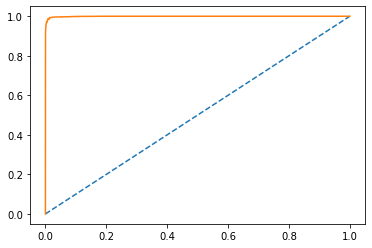

In [502]:
# predict probabilities
probs=ada.predict_proba(x_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_train_auc = metrics.roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % ada_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

</br>

<b>XGBoost with SMOTE</b>

In [503]:
xgb.fit(x_train_sm,y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [534]:
clas_report_xgb=metrics.classification_report(y_train_sm,y_pred_xgb,output_dict=True)
xgb_train_recall_zero=clas_report_xgb['0']['recall']
xgb_train_recall_one=clas_report_xgb['1']['recall']
xgb_score=xgb.score(x_train_sm,y_train_sm)

In [505]:
y_pred_xgb=xgb.predict(x_train_sm)
xgb_score=xgb.score(x_train_sm,y_train_sm)
conf_matrix=metrics.confusion_matrix(y_train_sm,y_pred_xgb)
clas_report_xgb=metrics.classification_report(y_train_sm,y_pred_xgb)#,output_dict=True)
print('ACCURACY SCORE')
print('-'*20)
print(xgb_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(conf_matrix)
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(clas_report_xgb)

ACCURACY SCORE
--------------------
1.0
 
 
CONFUSION MATRIX
--------------------
[[22788     0]
 [    0 22788]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22788
           1       1.00      1.00      1.00     22788

    accuracy                           1.00     45576
   macro avg       1.00      1.00      1.00     45576
weighted avg       1.00      1.00      1.00     45576



AUC: 1.000


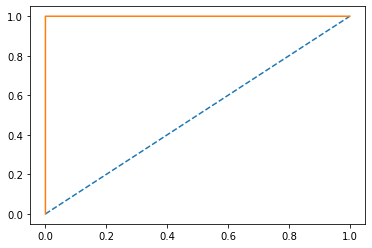

In [507]:
# predict probabilities
probs=xgb.predict_proba(x_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_train_auc = metrics.roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % xgb_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

</br>

<b>Decision Tree Classifier with SMOTE</b>

In [508]:
dcl=DecisionTreeClassifier(max_depth=15,min_samples_leaf=20,min_samples_split=45)
dcl.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=45,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [535]:
clas_report_dcl=metrics.classification_report(y_train_sm,y_pred_dcl,output_dict=True)
dcl_train_recall_zero=clas_report_dcl['0']['recall']
dcl_train_recall_one=clas_report_dcl['1']['recall']
dcl_score=dcl.score(x_train_sm,y_train_sm)

In [510]:
y_pred_dcl=dcl.predict(x_train_sm)
dcl_score=dcl.score(x_train_sm,y_train_sm)
conf_matrix=metrics.confusion_matrix(y_train_sm,y_pred_dcl)
clas_report_dcl=metrics.classification_report(y_train_sm,y_pred_dcl)#,output_dict=True)
print('ACCURACY SCORE')
print('-'*20)
print(dcl_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(conf_matrix)
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(clas_report_dcl)

ACCURACY SCORE
--------------------
0.9947560119361067
 
 
CONFUSION MATRIX
--------------------
[[22618   170]
 [   69 22719]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22788
           1       0.99      1.00      0.99     22788

    accuracy                           0.99     45576
   macro avg       0.99      0.99      0.99     45576
weighted avg       0.99      0.99      0.99     45576



AUC: 1.000


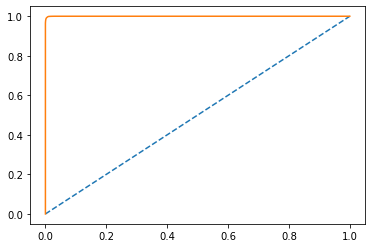

In [511]:
# predict probabilities
probs=dcl.predict_proba(x_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dcl_train_auc = metrics.roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % dcl_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

</br>

<b>Random Forest Classifier with SMOTE</b>

In [512]:
rcl=RandomForestClassifier(min_samples_leaf=800,min_samples_split=1500,max_depth=20,max_features=8)
rcl.fit(x_train_sm,y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=800, min_samples_split=1500,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [536]:
clas_report_rcl=metrics.classification_report(y_train_sm,y_pred_rcl,output_dict=True)
rcl_train_recall_zero=clas_report_rcl['0']['recall']
rcl_train_recall_one=clas_report_rcl['1']['recall']
rcl_score=rcl.score(x_train_sm,y_train_sm)

In [514]:
y_pred_rcl=rcl.predict(x_train_sm)
rcl_score=rcl.score(x_train_sm,y_train_sm)
conf_matrix=metrics.confusion_matrix(y_train_sm,y_pred_rcl)
clas_report_rcl=metrics.classification_report(y_train_sm,y_pred_rcl)#,output_dict=True)
print('ACCURACY SCORE')
print('-'*20)
print(rcl_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(conf_matrix)
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(clas_report_rcl)

ACCURACY SCORE
--------------------
0.9500833772160786
 
 
CONFUSION MATRIX
--------------------
[[22229   559]
 [ 1716 21072]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     22788
           1       0.97      0.92      0.95     22788

    accuracy                           0.95     45576
   macro avg       0.95      0.95      0.95     45576
weighted avg       0.95      0.95      0.95     45576



AUC: 0.988


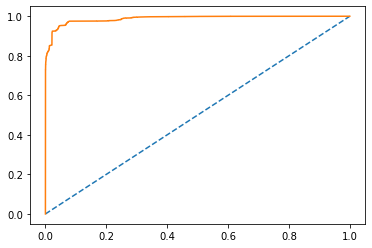

In [515]:
# predict probabilities
probs=rcl.predict_proba(x_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rcl_train_auc = metrics.roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % rcl_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

</br>

<b>Bagging Classifier with SMOTE</b>

In [516]:
bag=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,min_samples_leaf=500,min_samples_split=900))
bag.fit(x_train_sm,y_train_sm)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=15,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=500,
                                                        min_samples_split=900,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None

In [537]:
clas_report_bag=metrics.classification_report(y_train_sm,y_pred_bag,output_dict=True)
bag_train_recall_zero=clas_report_bag['0']['recall']
bag_train_recall_one=clas_report_bag['1']['recall']
bag_score=bag.score(x_train_sm,y_train_sm)

In [518]:
y_pred_bag=bag.predict(x_train_sm)
bag_score=bag.score(x_train_sm,y_train_sm)
conf_matrix=metrics.confusion_matrix(y_train_sm,y_pred_bag)
clas_report_bag=metrics.classification_report(y_train_sm,y_pred_bag)#,output_dict=True)
print('ACCURACY SCORE')
print('-'*20)
print(bag_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(conf_matrix)
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(clas_report_bag)

ACCURACY SCORE
--------------------
0.9620633666842198
 
 
CONFUSION MATRIX
--------------------
[[21624  1164]
 [  565 22223]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     22788
           1       0.95      0.98      0.96     22788

    accuracy                           0.96     45576
   macro avg       0.96      0.96      0.96     45576
weighted avg       0.96      0.96      0.96     45576



AUC: 0.995


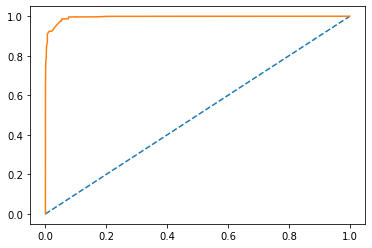

In [519]:
# predict probabilities
probs=bag.predict_proba(x_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = metrics.roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % bag_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

In [541]:
index=['Accuracy', 'AUC', 'Recall_zero','Recall_one']
df_score = pd.DataFrame({'GaussianNB':[gnb_score,gnb_train_auc,gnb_train_recall_zero,gnb_train_recall_one],
        'SVM':[svc_score,svc_train_auc,svc_train_recall_zero,svc_train_recall_one],
       'LDA':[lda_score,lda_train_auc,lda_train_recall_zero,lda_train_recall_one],
        'ANN':[ann_score,ann_train_auc,ann_train_recall_zero,ann_train_recall_one],
       'KNN':[knn_score,knn_train_auc,knn_train_recall_zero,knn_train_recall_one],
        'AdaBoost':[ada_score,ada_train_auc,ada_train_recall_zero,ada_train_recall_one],
         'XGBoost':[xgb_score,xgb_train_auc,xgb_train_recall_zero,xgb_train_recall_one],
         'Decision Tree':[dcl_score,dcl_train_auc,dcl_train_recall_zero,dcl_train_recall_one],                             
         'RF':[rcl_score,rcl_train_auc,rcl_train_recall_zero,rcl_train_recall_one],
         'Bagging':[bag_score,bag_train_auc,bag_train_recall_zero,bag_train_recall_one]},index=index)

In [542]:
round(df_score,2)

,GaussianNB,SVM,LDA,ANN,KNN,AdaBoost,XGBoost,Decision Tree,RF,Bagging
Accuracy,0.76,0.79,0.78,0.97,0.99,0.99,1.0,0.99,0.95,0.96
AUC,0.87,0.89,0.87,1.00,1.00,1.00,1.0,1.00,0.99,1.00
Recall_zero,0.87,0.75,0.75,0.99,1.00,0.99,1.0,0.99,0.98,0.95
Recall_one,0.65,0.84,0.82,0.96,0.97,0.99,1.0,1.00,0.92,0.98


After applying SMOTE on train data accuracy of GaussianNaiveBayes,SVC,LDA is lower but with better precision and recall  
AdaBoost,XGBoost,DecisionTree,Random Forest and BaggingClassifier performed excellently,while ANN's Accuracy remains almost the same before and after SMOTE but its precision and recall improved.  
  
1.SMOTE were used to handle/tune the imbalance dataset,no performance tuning were done on Models.  
2.No further tuning can be done for GaussianNB and LDA, already working on its best parameters.  
3.SVC,Decision Trees,Random Forest and ANN could be tuned using hyperparameters using GridSearchCV.  
4.AdaBoost,XGBoost and BaggingClassifier could be considered here as rescue boat if other models fails in hyperparameter  
then we could use these methods to boost the performance.  
5.We could try to find out whether SMOTE is really required after hyperparameter tuning.

<b>-------------------------------------------------------------------------------------------------------------------------------</b>

# <b>HyperParameter Tuning using the SMOTE train set</b>

<b>(Below models were run several times before the parameters were selected)</b>

### <b>Hyper Parameter Tuning on Support Vector Machine</b>

In [101]:
from sklearn.model_selection import GridSearchCV

In [348]:
param_grid={
    'C':[10,15],
    'gamma':[.001],
    'kernel':['rbf','poly'],
    'max_iter':[5000],
}
SVC=svm.SVC(probability=True)
grid_srch_svc=GridSearchCV(estimator=SVC,param_grid=param_grid,cv=3)

In [349]:
grid_srch_svc.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10, 15], 'gamma': [0.001],
                         'kernel': ['rbf', 'poly'], 'max_iter': [5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [350]:
svc_model=grid_srch_svc.best_estimator_

In [351]:
y_pred_svc_model=svc_model.predict(x_train_sm)
svc_model_score=svc_model.score(x_train_sm,y_train_sm)
conf_matrix=metrics.confusion_matrix(y_train_sm,y_pred_svc_model)
clas_report_svc_model=metrics.classification_report(y_train_sm,y_pred_svc_model)#,output_dict=True)
print('ACCURACY SCORE')
print('-'*20)
print(svc_model_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(conf_matrix)
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(clas_report_svc_model)

ACCURACY SCORE
--------------------
0.993900298402668
 
 
CONFUSION MATRIX
--------------------
[[22743    45]
 [  233 22555]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22788
           1       1.00      0.99      0.99     22788

    accuracy                           0.99     45576
   macro avg       0.99      0.99      0.99     45576
weighted avg       0.99      0.99      0.99     45576



In [605]:
clas_report_svc=metrics.classification_report(y_train_sm,y_pred_svc_model,output_dict=True)
svc_train_recall_zero=clas_report_svc['0']['recall']
svc_train_recall_one=clas_report_svc['1']['recall']

AUC: 0.999


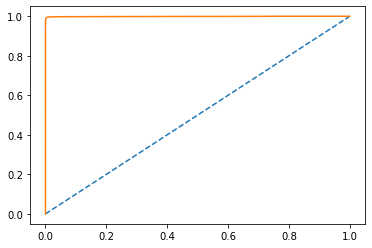

In [619]:
# predict probabilities
probs=svc_model.predict_proba(x_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svc_train_auc = metrics.roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % svc_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

</br>

### <b>Hyper Parameter Tuning on ANN</b>

In [353]:
param_grid={
    'hidden_layer_sizes': [(100,100)], 
    'max_iter': [5000], 
    'solver': ['sgd','adam'], 
    'tol': [0.1], 
    'activation':['logistic','relu']
#    'learning_rate': ['adaptive']
}
ANN=MLPClassifier()
grid_srch_ann=GridSearchCV(estimator=ANN,param_grid=param_grid,cv=2)

In [354]:
grid_srch_ann.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=2, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [355]:
ann_model=grid_srch_ann.best_estimator_

In [356]:
y_pred_ann_model=ann_model.predict(x_train_sm)
ann_model_score=ann_model.score(x_train_sm,y_train_sm)
conf_matrix=metrics.confusion_matrix(y_train_sm,y_pred_ann_model)
clas_report_ann_model=metrics.classification_report(y_train_sm,y_pred_ann_model)#,output_dict=True)
print('ACCURACY SCORE')
print('-'*20)
print(ann_model_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(conf_matrix)
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(clas_report_ann_model)

ACCURACY SCORE
--------------------
0.880616991398982
 
 
CONFUSION MATRIX
--------------------
[[19164  3624]
 [ 1817 20971]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.91      0.84      0.88     22788
           1       0.85      0.92      0.89     22788

    accuracy                           0.88     45576
   macro avg       0.88      0.88      0.88     45576
weighted avg       0.88      0.88      0.88     45576



In [608]:
clas_report_ann=metrics.classification_report(y_train_sm,y_pred_ann_model,output_dict=True)
ann_train_recall_zero=clas_report_ann['0']['recall']
ann_train_recall_one=clas_report_ann['1']['recall']

AUC: 0.961


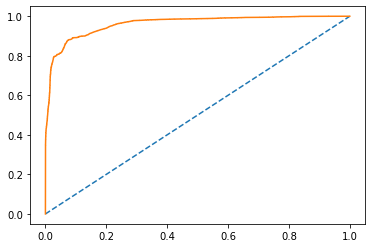

In [620]:
# predict probabilities
probs=ann_model.predict_proba(x_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_train_auc = metrics.roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % ann_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

In [110]:
grid_srch_ann.best_estimator_

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=25000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.1, validation_fraction=0.1, verbose=False,
              warm_start=False)

</br>

### <b>Hyper Parameter Tuning on Decision Tree</b>

In [358]:
param_grid={
    'criterion': ['gini'],
    'max_depth': [10,15,20],
    'max_features':[8,9,10],
    'min_samples_leaf': [25,30,35], 
    'min_samples_split': [45,50,60,70,80]
}
DCL=DecisionTreeClassifier()
grid_srch_dcl=GridSearchCV(estimator=DCL,param_grid=param_grid,cv=3)

In [359]:
grid_srch_dcl.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'], 'max_depth': [10, 15, 20],
   

In [360]:
dcl_model=grid_srch_dcl.best_estimator_
dcl_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [361]:
y_pred_dcl_model=dcl_model.predict(x_train_sm)
dcl_model_score=dcl_model.score(x_train_sm,y_train_sm)
conf_matrix=metrics.confusion_matrix(y_train_sm,y_pred_dcl_model)
clas_report_dcl_model=metrics.classification_report(y_train_sm,y_pred_dcl_model)#,output_dict=True)
print('ACCURACY SCORE')
print('-'*20)
print(dcl_model_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(conf_matrix)
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(clas_report_dcl_model)

ACCURACY SCORE
--------------------
0.9894023170089521
 
 
CONFUSION MATRIX
--------------------
[[22627   161]
 [  322 22466]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22788
           1       0.99      0.99      0.99     22788

    accuracy                           0.99     45576
   macro avg       0.99      0.99      0.99     45576
weighted avg       0.99      0.99      0.99     45576



In [610]:
clas_report_dcl=metrics.classification_report(y_train_sm,y_pred_dcl_model,output_dict=True)
dcl_train_recall_zero=clas_report_dcl['0']['recall']
dcl_train_recall_one=clas_report_dcl['1']['recall']

AUC: 1.000


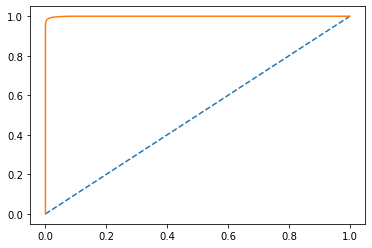

In [611]:
# predict probabilities
probs=dcl_model.predict_proba(x_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dcl_train_auc = metrics.roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % dcl_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

</br>

### <b>Hyper Parameter Tuning on Random Forest</b>

In [363]:
param_grid = {
    'max_depth': [10,15],
    'max_features':[8,10],
    'min_samples_leaf': [10,12],
    'min_samples_split': [20,40],
    'n_estimators': [200]
}
RFC=RandomForestClassifier()
grid_srch_rfc = GridSearchCV(estimator = RFC, param_grid = param_grid, cv =2)

In [364]:
grid_srch_rfc.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [365]:
rfc_model=grid_srch_rfc.best_estimator_

In [366]:
y_pred_rfc_model=rfc_model.predict(x_train_sm)
rfc_model_score=rfc_model.score(x_train_sm,y_train_sm)
conf_matrix=metrics.confusion_matrix(y_train_sm,y_pred_rfc_model)
clas_report_rfc_model=metrics.classification_report(y_train_sm,y_pred_rfc_model)#,output_dict=True)
print('ACCURACY SCORE')
print('-'*20)
print(rfc_model_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(conf_matrix)
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(clas_report_rfc_model)

ACCURACY SCORE
--------------------
0.9973012111637704
 
 
CONFUSION MATRIX
--------------------
[[22746    42]
 [   81 22707]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22788
           1       1.00      1.00      1.00     22788

    accuracy                           1.00     45576
   macro avg       1.00      1.00      1.00     45576
weighted avg       1.00      1.00      1.00     45576



In [612]:
clas_report_rfc=metrics.classification_report(y_train_sm,y_pred_rfc_model,output_dict=True)
rfc_train_recall_zero=clas_report_rfc['0']['recall']
rfc_train_recall_one=clas_report_rfc['1']['recall']

AUC: 1.000


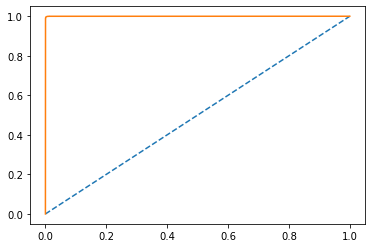

In [613]:
# predict probabilities
probs=rfc_model.predict_proba(x_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rfc_train_auc = metrics.roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % rfc_train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

In [119]:
grid_srch_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [621]:
index=['Accuracy', 'AUC', 'Recall_zero','Recall_one']
df_model_score = pd.DataFrame({'SVM':[svc_model_score,svc_train_auc,svc_train_recall_zero,svc_train_recall_one],
        'ANN':[ann_model_score,ann_train_auc,ann_train_recall_zero,ann_train_recall_one],
         'Decision Tree':[dcl_model_score,dcl_train_auc,dcl_train_recall_zero,dcl_train_recall_one],                             
         'RF':[rfc_model_score,rfc_train_auc,rfc_train_recall_zero,rfc_train_recall_one]},index=index)

In [622]:
round(df_model_score,2)

,SVM,ANN,Decision Tree,RF
Accuracy,0.99,0.88,0.99,1.0
AUC,1.00,0.96,1.00,1.0
Recall_zero,1.00,0.84,0.99,1.0
Recall_one,0.99,0.92,0.99,1.0


1.Hyperparameter Tuning had good effect on SVM.  
2.ANN performed well when the default parameters were used.  
3.Decision tree and Random Forest performance are excellent as they were before tuning.  
4.SMOTE did improve the performance of ANN and SVM,but model improved their performance on synthetically created data rather than on the given natural data.  
5.SMOTE didnt have any impact on performance of Random Forest and Decision Tree.   

<b>--------------------------------------------------------------------------------------------------------------------------------</b>

## Conclusion

**1. It is not advisable to use SMOTE on train data since it is artificially creating data point to treat the imbalance of the class/target, there is a possibility that we might have lost the natural characterstics of the train data.Above demonstration on SMOTE were done to show how SMOTE can have a significant impact on the performance of the model.**

**2. Moreover non parametric models had better performance when compared to parametric models,this could be due to the random behavior of the train data points.**

**3. Parametric models assume data comes from a certain distribution,to support this assumption it defines set of parameters to descirbe the function.Therefore we saw Parametric models in this case performed poorly on the train data points.**

**4. Non-Parametric model on the other hand do not assume that data points comes from any distribution and it can infinite no: of parameters as it keeps on branching,it purely depends on the user on how much the model should be trained, whereas we do not have any control on parameters of Parametric Model.**  

**5. Since Non-Parametric model performed well on the data we select Random Forest to be the final model on which train data will be fitted and eventually used to predict the test data.**

**6. With help of hyper parameter tuning and recall square calculated while submission of csv file we try to enhance the Random Forest Classifier,since from above it is clear that it has excellent Recall,Precision,Accuracy and AUC we avoid calculating the same in the next step.**

**7. Eventhough high accuracy,recall and precision of model on train data looks like overfit it performs well even for test data from recall perspective,this may be because test data is also generated from same cloud of data points as of train data.** 

</br>

**Random Forest Predictions on original train data (ran several times with different parameters before selection of below).**

In [641]:
rcl=RandomForestClassifier(min_samples_leaf=2,min_samples_split=4,max_depth=17,max_features=8)

In [642]:
rcl.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [643]:
y_train_predict = rcl.predict(x_train)
model_score = rcl.score(x_train, y_train)
print('ACCURACY SCORE')
print(model_score)
print(' ')
print(' ')
print('CONFUSION MATRIX')
print('-'*20)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(' ')
print(' ')
print('CLASSIFICATION REPORT')
print('-'*20)
print(metrics.classification_report(y_train, y_train_predict))

ACCURACY SCORE
0.999874245472837
 
 
CONFUSION MATRIX
--------------------
[[ 1067     1]
 [    2 22786]]
 
 
CLASSIFICATION REPORT
--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00     22788

    accuracy                           1.00     23856
   macro avg       1.00      1.00      1.00     23856
weighted avg       1.00      1.00      1.00     23856



AUC: 1.000


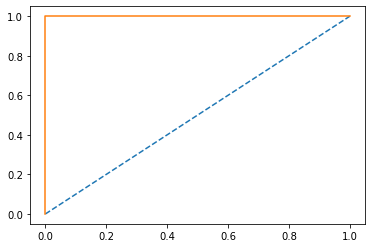

In [644]:
# predict probabilities
probs=rcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = metrics.roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds =metrics.roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

In [645]:
y_test_pred_rcl=rcl.predict(x_test)

data={'INCIDENT_ID':test_incid,'MULTIPLE_OFFENSE':y_test_pred_rcl}
df_rfc1=pd.DataFrame(data)

df_rfc1.to_csv('D:\\ANALYTICS\\HACKATHONS\\Hackerearth-Novartis\\RFC_RamKishore_V11.csv')

<b>--------------------------------------------------------------------------------------------------------------------------------</b>